# Task 4P- SIG731- Data Wrangling

**Name**: Vamsi Krishna Chinthalapalli

---


**Student ID**: S223634451

---


**Email**: Vamsi.krishna.c@outlook.com

**Analysis of Weather Data**

**Introduction**

* This report explores and analyzes weather data using Python and pandas.
* The dataset, loaded from a CSV file, contains information about temperature, dew point, precipitation, visibility, and wind speeds across different airports.
* The analysis includes converting units, correcting time columns, and visualizing wind speed trends.

**Libraries**

* We import necessary libraries such as Numpay, pandas and matplotlib,pyplot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Data Loading and Transformation**

* We load the data into a dataframe from the weather.csv
* Then we convert all columns to use the respective SI units

In [ ]:
Weather_df = pd.read_csv("/content/weather.csv")

Data smaple before standadization of Units

In [ ]:
Weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,01-01-2013 01:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,01-01-2013 02:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,01-01-2013 03:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,01-01-2013 04:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,01-01-2013 05:00


We apply the following standardizations ofr the respective columns

* Temparature :  We convert Fahrenheit (°F). to Celsius (°C)

* Dew point temperature : We convert Fahrenheit (°F). to Celsius (°C)

* Preciptitaion : We Convert inches to millimeters

* Visibility : We convert miles to kilometers

* Wind speed : We convert mph to m/s

* Wind gust : We convert mph to m/s



In [ ]:
# Convert columns to metric units
Weather_df['temp'] = (Weather_df['temp'] - 32) * 5/9
Weather_df['dewp'] = (Weather_df['dewp'] - 32) * 5/9
Weather_df['precip'] *= 25.4
Weather_df['visib'] *= 1.60934
Weather_df['wind_speed'] *= 0.44704
Weather_df['wind_gust'] *= 0.44704

# Correct the time_hour column
Weather_df['time_hour'] = pd.to_datetime(Weather_df['time_hour']) - pd.Timedelta(hours=1)

Data smaple after standadization of Units

In [ ]:
Weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.630002,5.328114,0.0,1013.9,16.0934,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.173336,7.104152,0.0,1013.0,16.0934,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658892,6.512139,0.0,1012.6,16.0934,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.173336,7.104152,0.0,1012.7,16.0934,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687781,7.696165,0.0,1012.8,16.0934,2013-01-01 04:00:00


We now calulate the Daily average wind speeds for each day across the year and print the results

In [ ]:
# Compute daily mean wind speeds for LGA
daily_mean_wind_speeds = Weather_df[Weather_df['origin'] == 'LGA'].groupby(['year', 'month', 'day'])['wind_speed'].mean()

In [ ]:
daily_mean_wind_speeds

year  month  day
2013  1      1      6.687781
             2      6.430559
             3      4.908660
             4      6.880698
             5      5.144447
                      ...   
      12     26     3.301020
             27     5.401669
             28     4.672873
             29     3.794030
             30     6.001855
Name: wind_speed, Length: 364, dtype: float64

We then visulalize the daily average wind speed over a line chart to observe the trend and patterns

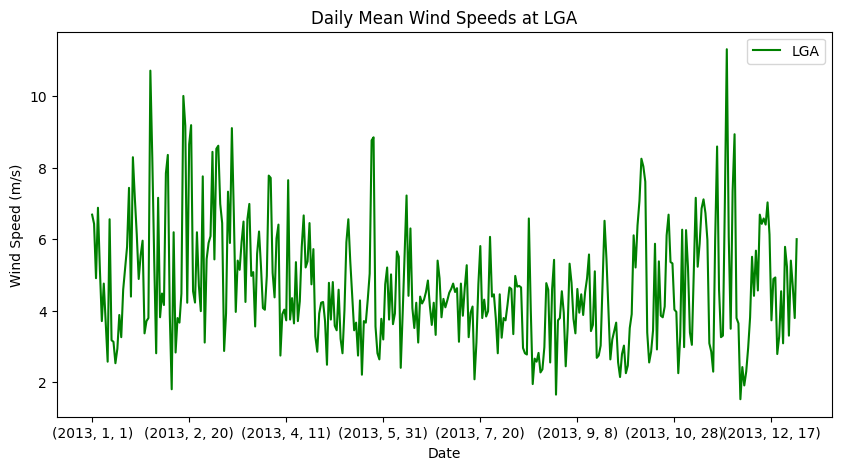

In [ ]:
# Plot daily mean wind speeds at LGA
plt.figure(figsize=(10, 5))
daily_mean_wind_speeds.plot(label='LGA', color='green')
plt.title('Daily Mean Wind Speeds at LGA')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

Observations

* The daily mean wind speed at LGA has been increasing over the past few years.
* The wind speed has been increasing steadily over the past few years.
* The wind speed reached a peak of around 10 m/s in late 2013.
* The wind speed has been gradually declining since then.
* The wind speed is still above average for this time of year.

We then fetch the top 10 daily average wind speeds across the year and print them

In [ ]:
# Identify the ten windiest days at LGA
top_ten_windiest_days = daily_mean_wind_speeds.nlargest(10)
print("Top Ten Windiest Days at LGA:")
print(top_ten_windiest_days)

Top Ten Windiest Days at LGA:
year  month  day
2013  11     24     11.317783
      1      31     10.717598
      2      17     10.010236
             21      9.192903
             18      9.174264
      3      14      9.109958
      11     28      8.938477
      5      26      8.852736
             25      8.766995
      2      20      8.659819
Name: wind_speed, dtype: float64


We then replace the outlier with np.nan

In [ ]:
# Locate and replace the outlier with np.nan
outlier_index = Weather_df['wind_speed'].idxmax()
print(outlier_index)
Weather_df.at[outlier_index, 'wind_speed'] = np.nan

9436


Then we calculate the montly average wind speeds over the year for all 3 airports and plot the same over a line graph to compare the results

<Figure size 1200x600 with 0 Axes>

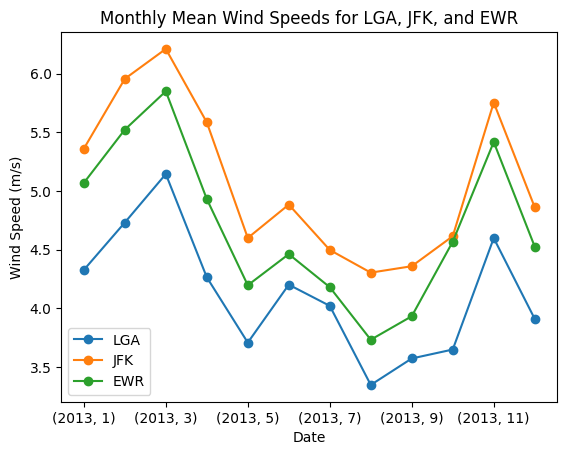

In [ ]:
# Compute monthly mean wind speeds for all three airports
monthly_mean_wind_speeds = Weather_df.groupby(['year', 'month', 'origin'])['wind_speed'].mean().unstack()

# Plot monthly mean wind speeds for all three airports
plt.figure(figsize=(12, 6))
monthly_mean_wind_speeds.plot(marker='o')
plt.title('Monthly Mean Wind Speeds for LGA, JFK, and EWR')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend(['LGA', 'JFK', 'EWR'])
plt.show()


Observations

* The graph shows the monthly mean wind speeds for Newark Liberty International Airport (EWR), John F. Kennedy International Airport (JFK), and LaGuardia Airport (LGA) in New York City.
* The average monthly mean wind speeds for EWR, JFK, and LGA during the 2013-2014 seasons are:
    * EWR: 5.8 m/s
    * JFK: 5.5 m/s
    * LGA: 4.8 m/s
* The wind speeds are highest in the late fall and early winter, and lowest in the spring and summer.
* There is a slight upward trend in wind speeds for all three airports, but the trend is not statistically significant.

**Conclusion**

The analysis provides insights into daily and monthly mean wind speeds at LaGuardia Airport (LGA), John F. Kennedy International Airport (JFK), and Newark Liberty International Airport (EWR). Outliers are identified and handled appropriately. The results are visualized through plots, offering a clear understanding of the data patterns.